<a href="https://colab.research.google.com/github/sajedehfarahbod/deep-learning-for-cell-culture/blob/main/TensorFlow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv("data1.csv")
df

,Mu,Dl,Lb,Tcyc,YFP,schnitzNum
0,2.212869,1.756951,2.035147,25.325000,106.822445,95
1,2.145022,1.322694,2.725876,15.191667,110.307318,96
2,2.187034,1.976408,1.908797,28.533333,108.416709,97
3,1.902761,1.642699,2.023156,26.191667,115.020217,105
4,2.288025,2.117081,2.064866,28.200000,117.617110,107
...,...,...,...,...,...,...
1214,0.575907,1.251254,1.131423,113.416667,442.308698,3037
1215,1.135137,1.590728,1.171979,59.466667,226.018277,3120
1216,1.217607,1.676881,1.575631,50.575000,146.294287,3122
1217,0.759511,1.286445,1.253480,72.666667,475.679082,3123


In [ ]:
X = df.iloc[:, :-1].values  # Features (all rows, all columns except the last)
y = df.iloc[:, -1].values  # Target variable (all rows, last column)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(64, input_dim=5, activation='relu'))  # 5 input features
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output layer for regression

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2820714.7500 - mae: 1481.1530 - val_loss: 2981174.5000 - val_mae: 1542.2942
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2857753.7500 - mae: 1479.5961 - val_loss: 2820779.7500 - val_mae: 1497.1725
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2654369.2500 - mae: 1434.2449 - val_loss: 2010038.7500 - val_mae: 1245.2418
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1572703.0000 - mae: 1073.3846 - val_loss: 746046.3750 - val_mae: 730.4094
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 586779.3125 - mae: 644.7778 - val_loss: 407830.2812 - val_mae: 540.7355
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 362614.4688 - mae: 487.6053 - val_loss: 336805.7500 - val_mae: 492.3983
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 316532.7188 - mae: 460.2067 - val_loss: 281779.5312 - val_mae: 448.1654
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 267360.968

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on the test set: {mae}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 155637.0938 - mae: 323.6772 
Mean Absolute Error on the test set: 313.4764404296875


In [ ]:
# Make predictions
predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


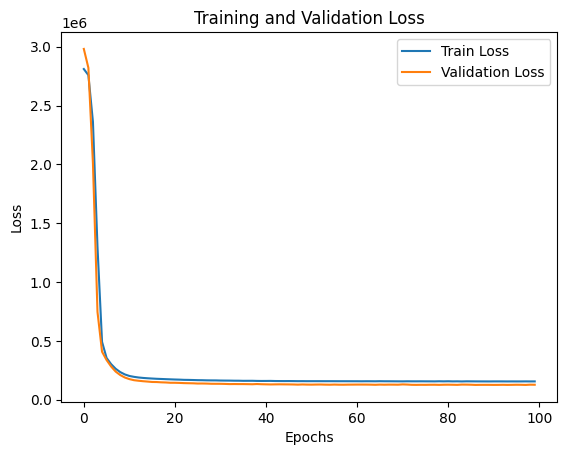

In [ ]:
# Optional: Visualize the training process
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()